<a href="https://colab.research.google.com/github/honggilgim/python_test_with_colab/blob/main/%EC%A3%BC%EC%96%B4%EC%A7%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EC%9D%BC%EC%9B%90%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 주어진 데이터로 일원 분산분석하기.

import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = np.genfromtxt('/content/altman_910.txt', delimiter=',')

In [3]:
# 첫 열의 값이 1이면 group1로, 2이면 group2로 나누기
group1 = data[data[:, 1]==1 ,0]
group2 = data[data[:, 1]==2, 0]
group3 = data[data[:, 1]==3, 0]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


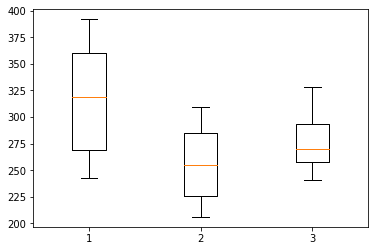

In [4]:
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

In [5]:
# 같은 자료에서 그룹별로 값에 대하여 일원 분석하기
stats.f_oneway(group1,group2,group3)

F_onewayResult(statistic=3.7113359882669763, pvalue=0.043589334959178244)

In [6]:
# 각 그룹쌍에 대하여 t 검정하기
print(stats.ttest_ind(group1,group2))

Ttest_indResult(statistic=2.5581789927784295, pvalue=0.02184081286794004)


In [7]:
print(stats.ttest_ind(group1,group3))

Ttest_indResult(statistic=1.326611291434599, pvalue=0.21151930405600672)


In [8]:
print(stats.ttest_ind(group2,group3))

Ttest_indResult(statistic=-1.0724508202985763, pvalue=0.30461196197608215)


In [10]:
# 그룹 1과 2의 평균값에 대해 다중 비교하기

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=data[:,0],
                          groups=data[:,1],
                          alpha=0.05)
tukey.summary()
# 다중 비교 결과. group1과 group2에서 귀무 가설이 기각되는 것을 볼 수 있음.

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,-60.1806,0.0354,-116.6056,-3.7555,True
1.0,3.0,-38.625,0.3217,-104.8246,27.5746,False
2.0,3.0,21.5556,0.6706,-43.2141,86.3252,False
